# Stock Market Portfolio Optimization

Stock Market Portfolio Optimization is a data-driven approach to constructing an investment portfolio that aims to maximize expected returns while minimizing associated risks. This project involves analyzing historical performance data, financial indicators, and market trends to identify the most efficient combination of stocks. By applying quantitative techniques such as mean-variance optimization, risk-return tradeoff analysis, and diversification strategies, the project seeks to create an optimal portfolio tailored to specific investment goals and risk appetites.

Stock market portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification

The expected results from stock market portfolio optimization include identifying the portfolio with the highest Sharpe ratio, which indicates the best risk-adjusted return and provides a clear allocation strategy for the selected stocks to achieve long-term investment goals.

#  Data Collection of stock market data using the yfinance API.

In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

In [3]:
# defining the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# list of stock tickers to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

df = yf.download(tickers, start=start_date, end=end_date, progress=False,auto_adjust=True)
data = df.reset_index()

In [4]:
data

Price        Date        Close                                         \
Ticker             HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS   
0      2024-07-30  1597.970703  1830.265137  1508.031738  4291.535156   
1      2024-07-31  1598.168457  1821.587402  1500.332886  4311.196777   
2      2024-08-01  1620.967651  1806.328247  1510.174561  4322.748047   
3      2024-08-02  1641.096191  1775.712524  1494.253418  4210.626465   
4      2024-08-05  1598.168457  1708.143555  1442.429321  4084.791260   
..            ...          ...          ...          ...          ...   
245    2025-07-23  2024.300049  1574.500000  1424.599976  3179.100098   
246    2025-07-24  2014.199951  1552.500000  1402.900024  3148.000000   
247    2025-07-25  2004.599976  1515.699951  1391.699951  3135.800049   
248    2025-07-28  2008.500000  1516.000000  1387.599976  3079.300049   
249    2025-07-29  2021.599976  1513.699951  1417.099976  3056.000000   

Price          High                                                 Low  ...  \
Ticker  HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS  ...   
0       1616.961733  1832.995131  1519.841631  4323.632972  1581.600741  ...   
1       1610.186273  1838.065321  1505.340791  4339.362229  1591.689682  ...   
2       1632.095236  1821.246152  1512.865379  4344.572372  1600.344431  ...   
3       1652.322664  1813.055967  1504.219593  4323.632934  1613.252478  ...   
4       1628.089296  1752.604599  1478.880678  4167.321925  1583.578957  ...   
..              ...          ...          ...          ...          ...  ...   
245     2029.800049  1591.900024  1426.000000  3182.000000  2003.000000  ...   
246     2037.699951  1582.000000  1423.000000  3173.699951  2008.400024  ...   
247     2015.000000  1549.500000  1401.000000  3156.899902  1999.000000  ...   
248     2021.400024  1519.300049  1407.800049  3118.000000  2000.500000  ...   
249     2026.500000  1517.199951  1420.199951  3074.000000  1996.300049  ...   

Price                                    Open                            \
Ticker  RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS  RELIANCE.NS   
0       1504.892369  4254.128266  1584.568097  1824.366198  1511.893631   
1       1496.072322  4271.528973  1596.437499  1830.118857  1498.912657   
2       1499.211768  4291.239703  1605.240641  1809.740829  1506.885674   
3       1488.223955  4197.797323  1613.252478  1796.968082  1499.909271   
4       1428.401979  4040.994756  1622.253472  1740.368007  1474.993846   
..              ...          ...          ...          ...          ...   
245     1414.400024  3157.600098  2011.000000  1576.300049  1426.000000   
246     1396.000000  3140.000000  2037.699951  1580.000000  1419.199951   
247     1384.099976  3125.600098  2015.000000  1543.400024  1398.900024   
248     1385.000000  3069.899902  2003.000000  1513.900024  1392.300049   
249     1383.000000  3041.199951  1999.900024  1512.900024  1383.000000   

Price                    Volume                                 
Ticker       TCS.NS HDFCBANK.NS   INFY.NS RELIANCE.NS   TCS.NS  
0       4316.849742    27297917   2721265     8228208  1797906  
1       4276.444426    18910242   5004209    10057346  2330091  
2       4325.008963    13107587   7475014    10764222  2202244  
3       4291.190940    22059619   7400938    10268248  2811282  
4       4167.321925    20666817  10736703    17046704  2787771  
..              ...         ...       ...         ...      ...  
245     3159.600098     6817458   8035026     8354596  1922875  
246     3165.100098     9553588  14169664    14740507  2934778  
247     3140.000000     4653299  10851259    11854722  2568917  
248     3110.000000     6029790   6439855     7748361  3374473  
249     3060.000000     9947848   7070448    10750072  4785312  

[250 rows x 21 columns]

In [5]:
print(data.columns.tolist())

[('Date', ''), ('Close', 'HDFCBANK.NS'), ('Close', 'INFY.NS'), ('Close', 'RELIANCE.NS'), ('Close', 'TCS.NS'), ('High', 'HDFCBANK.NS'), ('High', 'INFY.NS'), ('High', 'RELIANCE.NS'), ('High', 'TCS.NS'), ('Low', 'HDFCBANK.NS'), ('Low', 'INFY.NS'), ('Low', 'RELIANCE.NS'), ('Low', 'TCS.NS'), ('Open', 'HDFCBANK.NS'), ('Open', 'INFY.NS'), ('Open', 'RELIANCE.NS'), ('Open', 'TCS.NS'), ('Volume', 'HDFCBANK.NS'), ('Volume', 'INFY.NS'), ('Volume', 'RELIANCE.NS'), ('Volume', 'TCS.NS')]


In [6]:
def data_clean(data):
    ''' Function for data cleaning and converting into usable format'''
    data.columns = ['_'.join(filter(None, map(str, col))) for col in data.columns]
    data_melted = data.melt(id_vars='Date', var_name='Stock', value_name='Price')
    data_melted[['PriceType', 'Ticker']] = data_melted['Stock'].str.split('_', n=1, expand=True)
    data_melted.drop(columns=['Stock'],axis=1,inplace=True)
    data_pivoted=data_melted.pivot_table(index=['Date','Ticker'],columns='PriceType',values='Price',aggfunc='first')
    stock_data=data_pivoted.reset_index()
    return stock_data

In [7]:
stock_data=data_clean(data)

In [11]:
stock_data

PriceType,Date,Ticker,Close,High,Low,Open,Volume
0,2024-07-30,HDFCBANK.NS,1597.970703,1616.961733,1581.600741,1584.568097,27297917.0
1,2024-07-30,INFY.NS,1830.265137,1832.995131,1813.543462,1824.366198,2721265.0
2,2024-07-30,RELIANCE.NS,1508.031738,1519.841631,1504.892369,1511.893631,8228208.0
3,2024-07-30,TCS.NS,4291.535156,4323.632972,4254.128266,4316.849742,1797906.0
4,2024-07-31,HDFCBANK.NS,1598.168457,1610.186273,1591.689682,1596.437499,18910242.0
...,...,...,...,...,...,...,...
995,2025-07-28,TCS.NS,3079.300049,3118.000000,3069.899902,3110.000000,3374473.0
996,2025-07-29,HDFCBANK.NS,2021.599976,2026.500000,1996.300049,1999.900024,9947848.0
997,2025-07-29,INFY.NS,1513.699951,1517.199951,1496.099976,1512.900024,7070448.0
998,2025-07-29,RELIANCE.NS,1417.099976,1420.199951,1383.000000,1383.000000,10750072.0


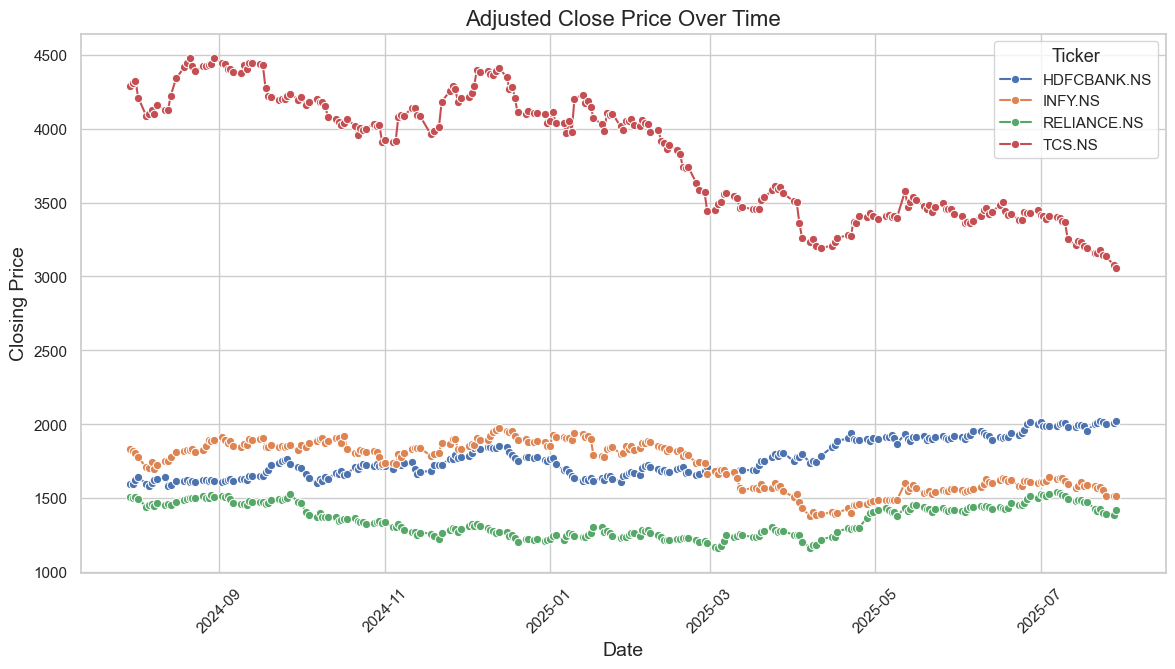

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

The graph displays the adjusted close prices of four stocks (HDFCBANK.NS, INFY.NS, RELIANCE.NS, TCS.NS) over time from July 2024 to July 2025. It highlights that TCS has the highest adjusted close prices, followed by HDFCBANK, INFY (Infosys), and RELIANCE. The prices for RELIANCE and TCS show noticeable upward trends in the 1st quarter of 2025, which indicates strong performance, while HDFCBANK and INFY exhibit more stability with relatively lower price fluctuations.

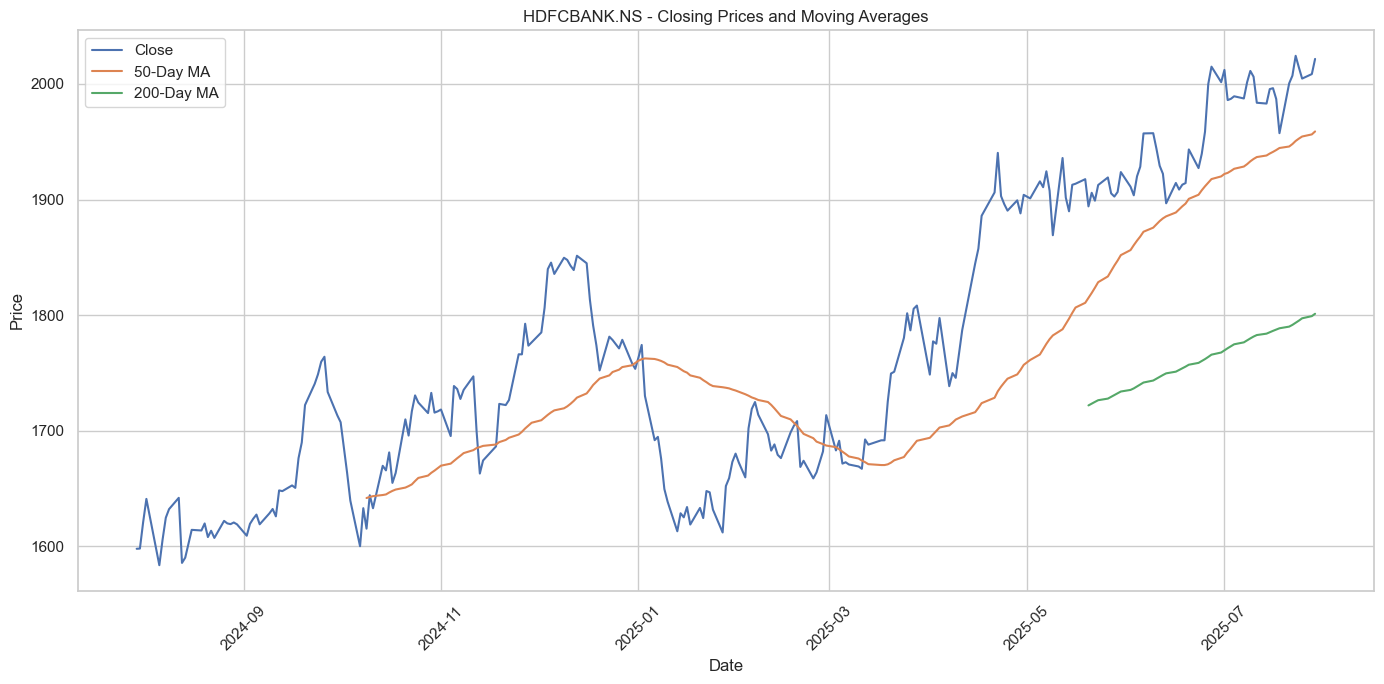

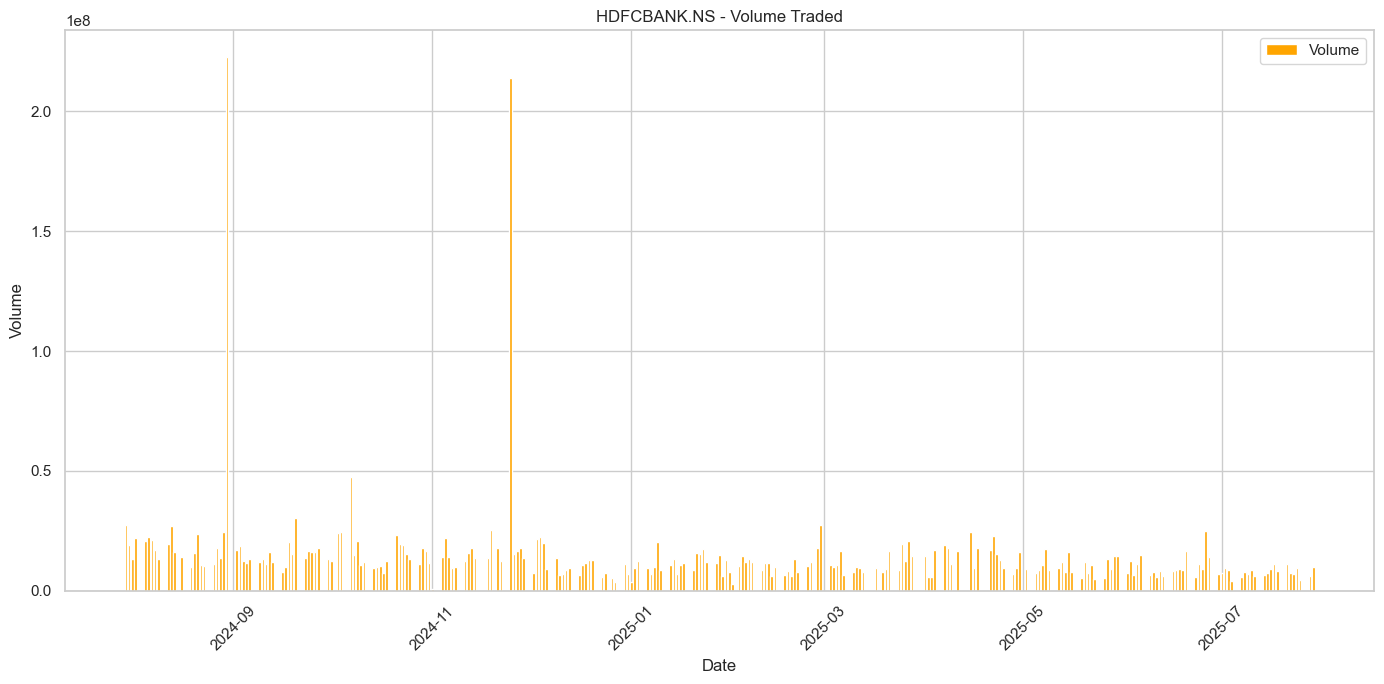

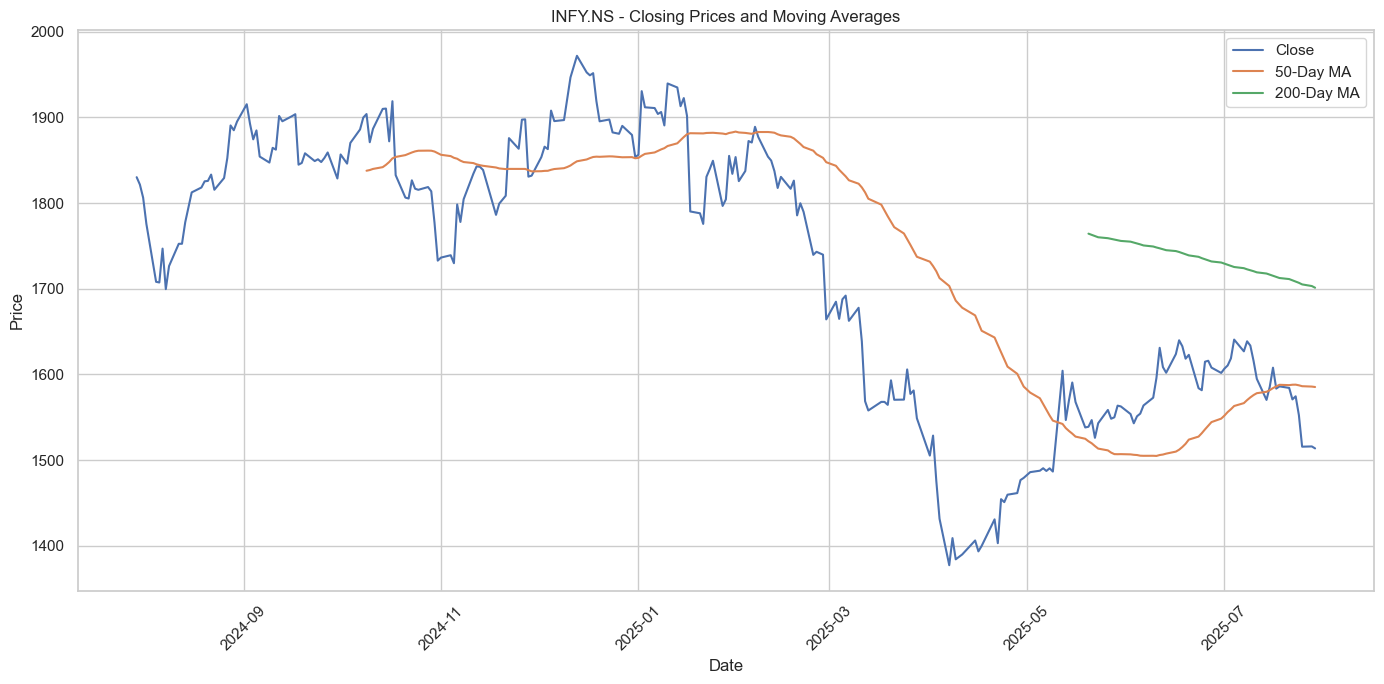

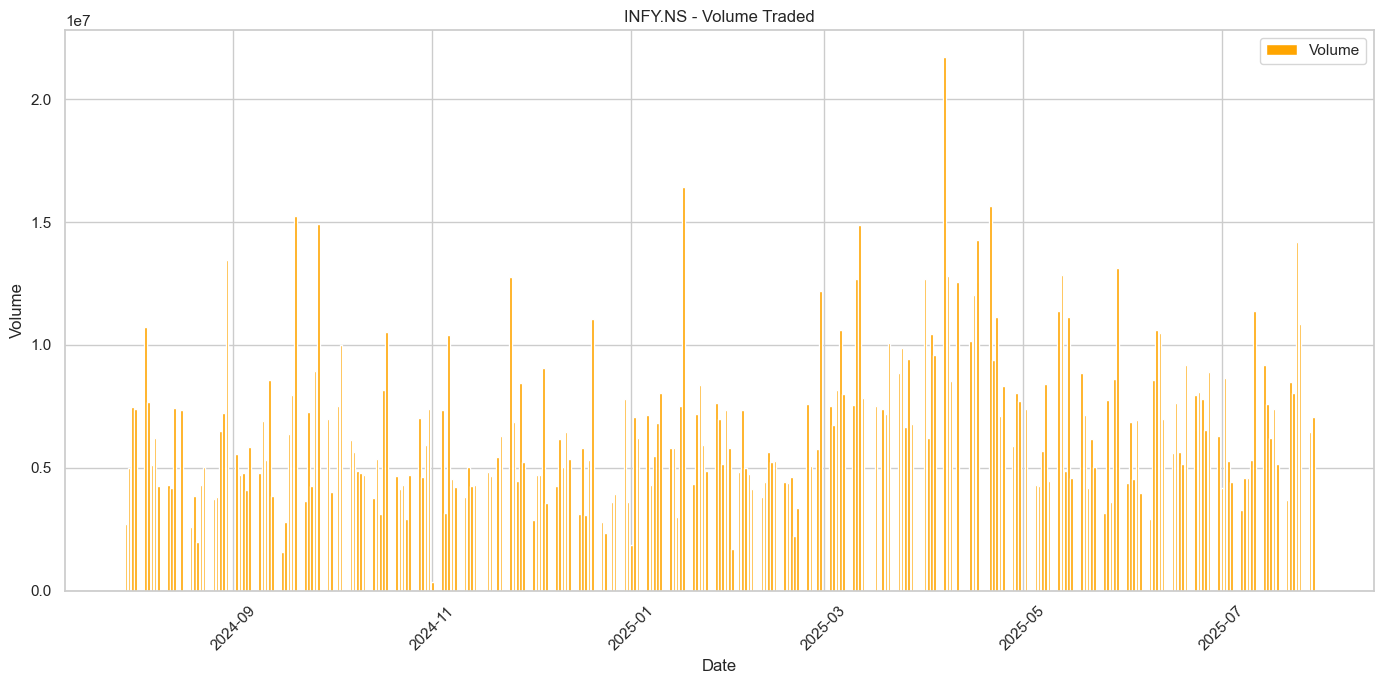

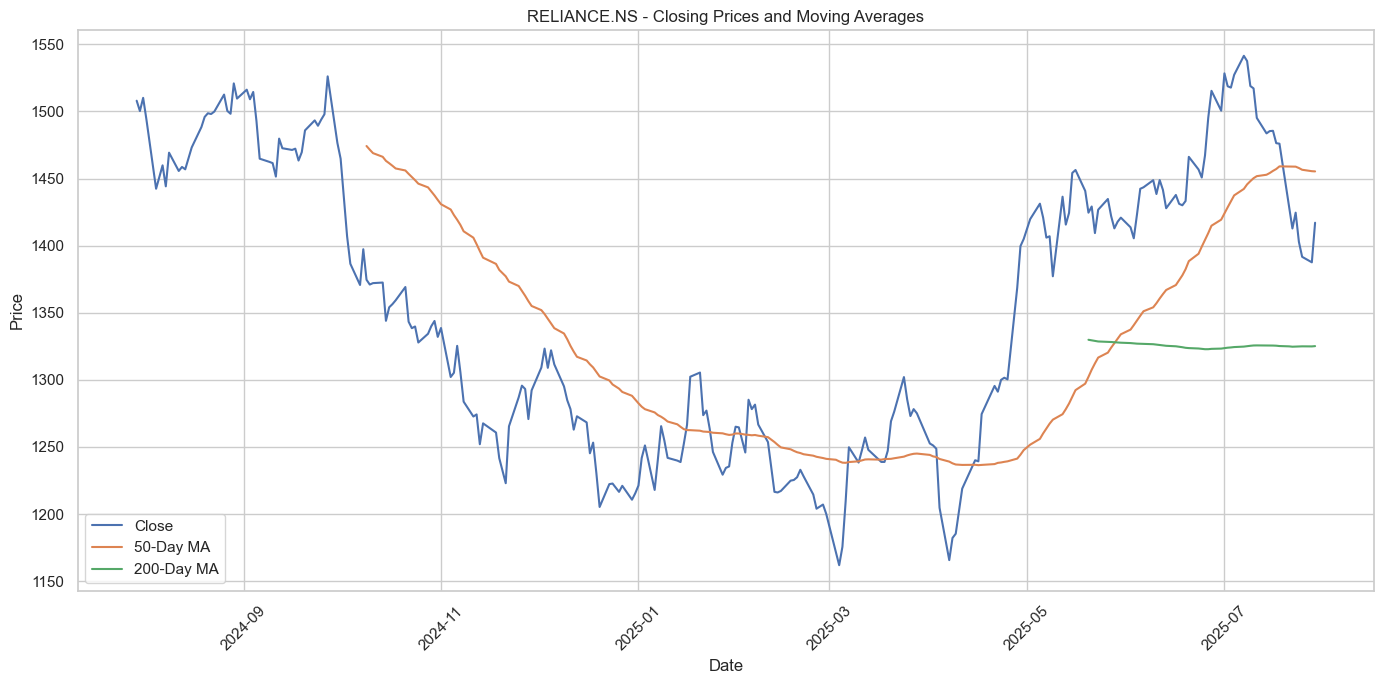

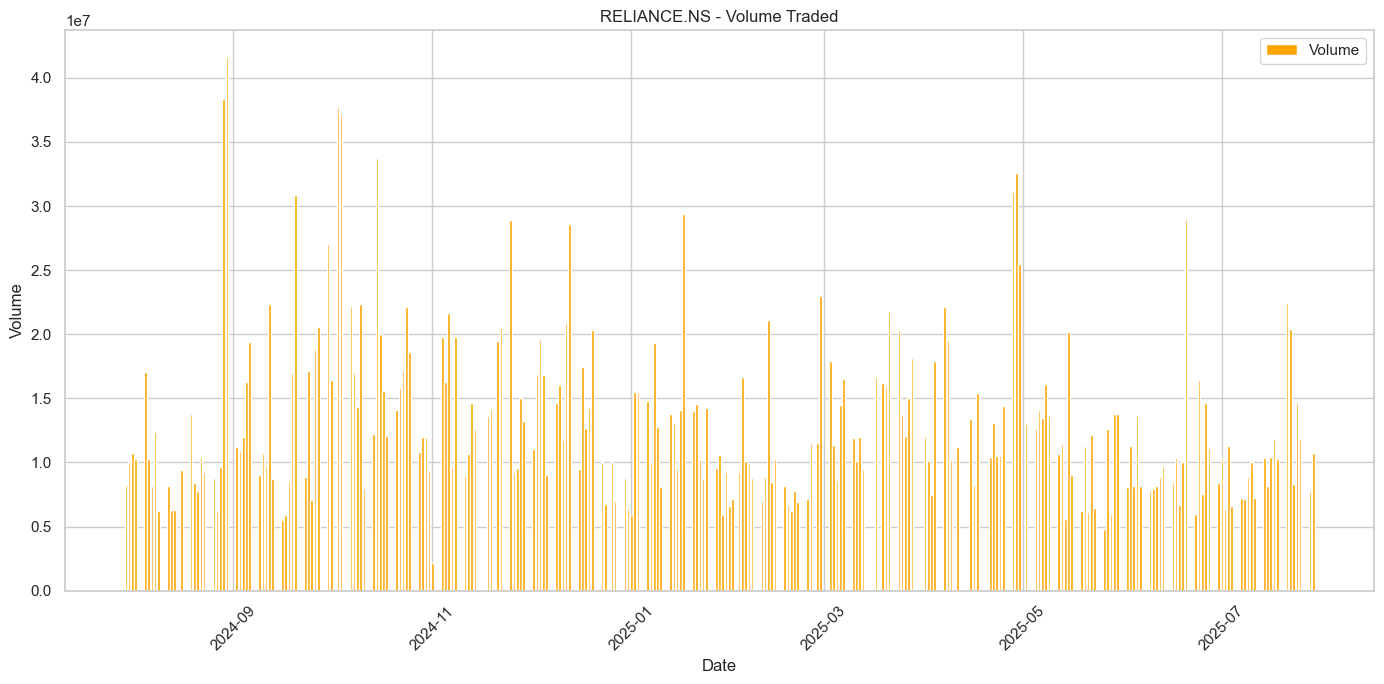

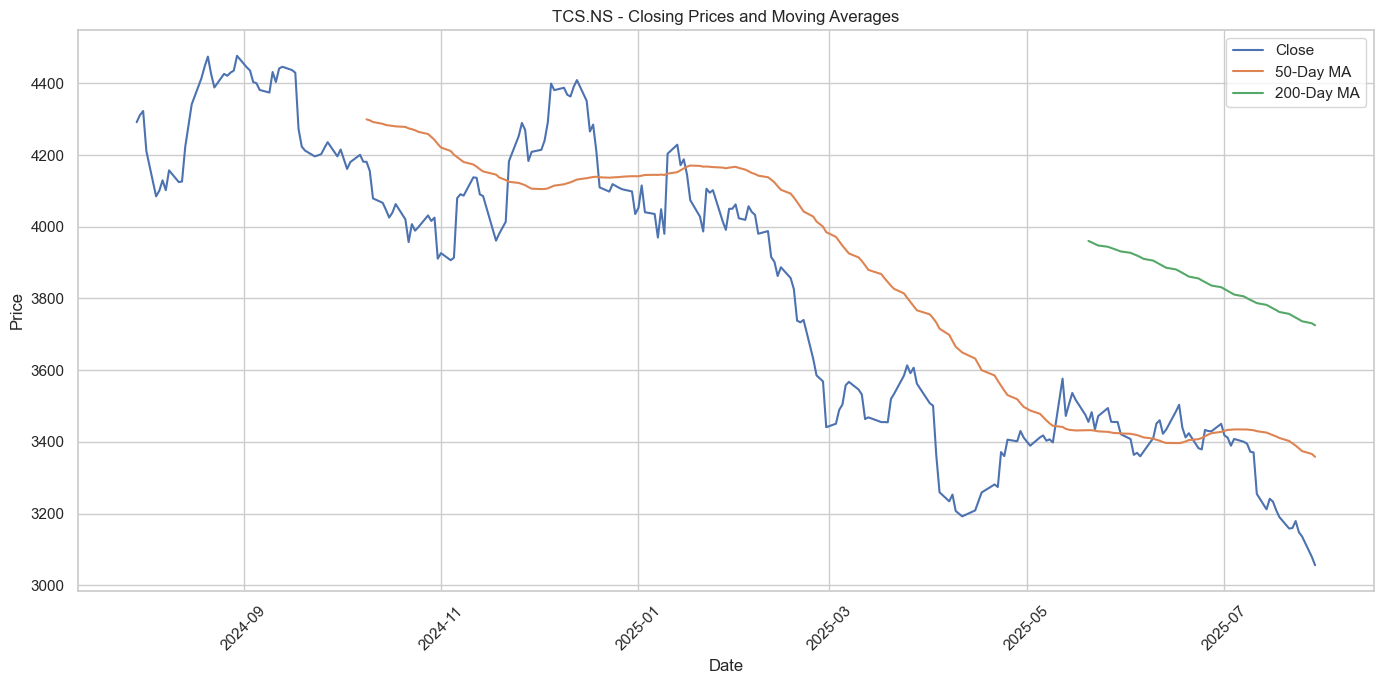

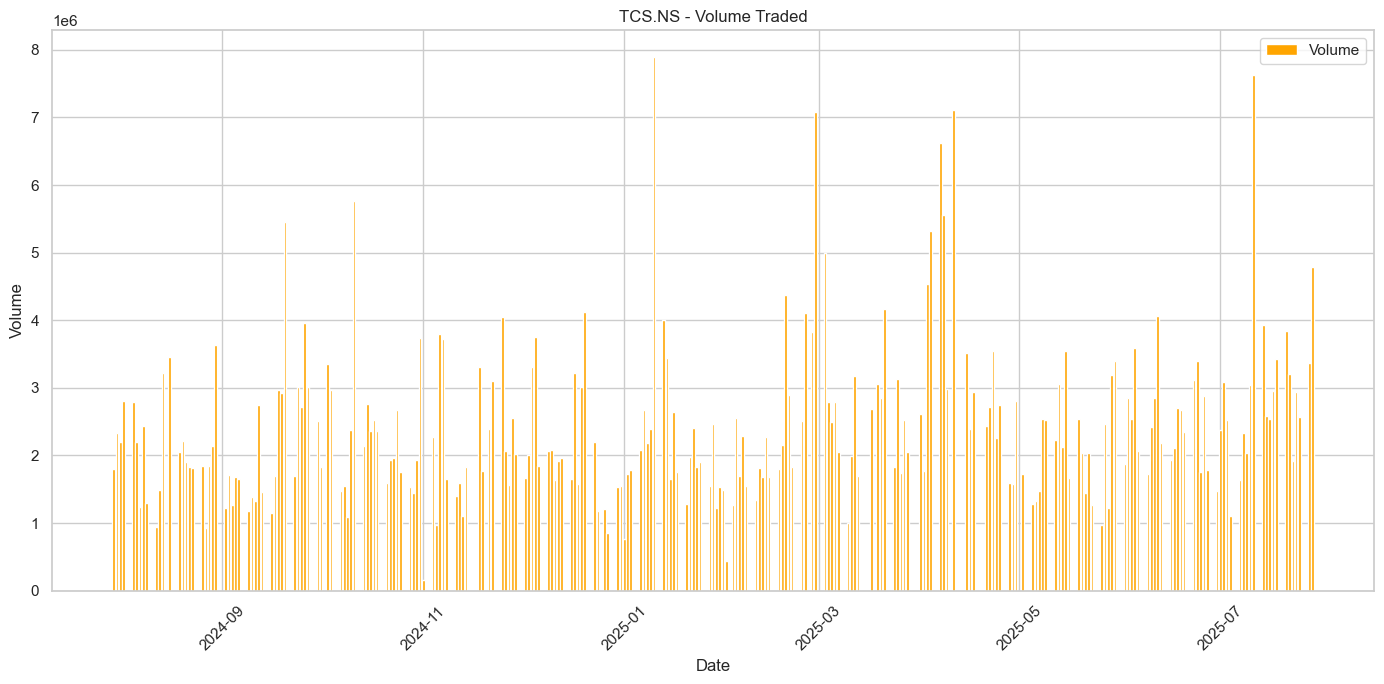

In [34]:
short_window = 50
long_window = 200

unique_tickers = stock_data['Ticker'].unique()

def moving_avg(stock_data,unique_tickers):
    for ticker in unique_tickers:
        ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
        ticker_data['50_MA'] = ticker_data['Close'].rolling(window=short_window).mean()
        ticker_data['200_MA'] = ticker_data['Close'].rolling(window=long_window).mean()
    
        plt.figure(figsize=(14, 7))
        plt.plot(ticker_data.index, ticker_data['Close'], label='Close')
        plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
        plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
        plt.title(f'{ticker} - Closing Prices and Moving Averages')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
        plt.figure(figsize=(14, 7))
        plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
        plt.title(f'{ticker} - Volume Traded')
        plt.xlabel('Date')
        plt.ylabel('Volume')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

#plotting moving average of stocks
moving_avg(stock_data,unique_tickers)

For HDFCBANK and INFY, the stock prices went down at first but later started to rise again, which we can see from their moving average lines. RELIANCE and TCS, on the other hand, showed a steady upward trend in their prices over time. When we look at the trading volume charts, we notice some big spikes, especially for HDFCBANK and RELIANCE in early 2024. These spikes show times when a large number of shares were bought or sold. Understanding these price changes and trading patterns helps investors make better and more informed decisions.

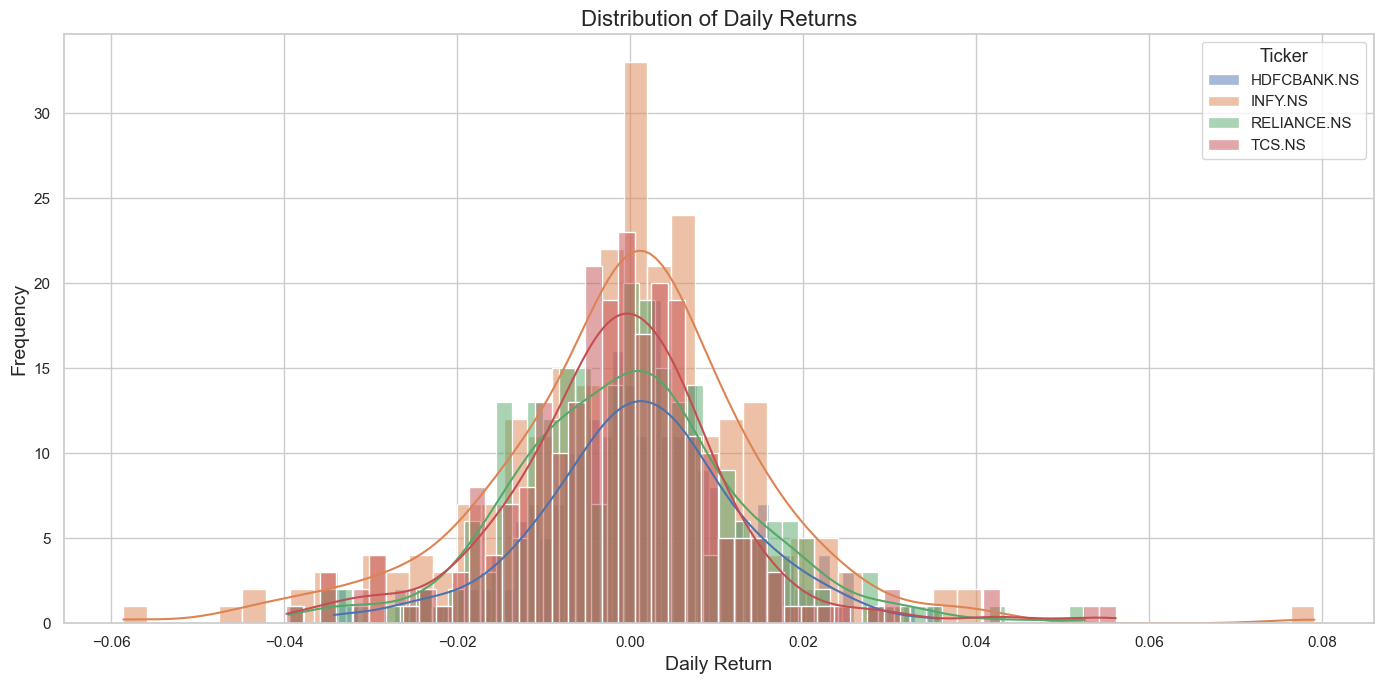

In [45]:
def daily_return(stock_data,unique_tickers):
    ''' Plotting Histogram of Daily returns'''
    stock_data['Daily Return'] = stock_data.groupby('Ticker')['Close'].pct_change()
    
    plt.figure(figsize=(14, 7))
    sns.set(style='whitegrid')
    
    for ticker in unique_tickers:
        ticker_data = stock_data[stock_data['Ticker'] == ticker]
        sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)
    
    plt.title('Distribution of Daily Returns', fontsize=16)
    plt.xlabel('Daily Return', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

daily_return(stock_data,unique_tickers)

The daily return distributions are normally distributed and centered around zero, meaning most returns are close to the average. However, the ends of the curves (tails) show that there are occasional big gains or losses. INFY and RELIANCE have slightly wider curves, which means their prices tend to move more and are more volatile compared to HDFCBANK and TCS.

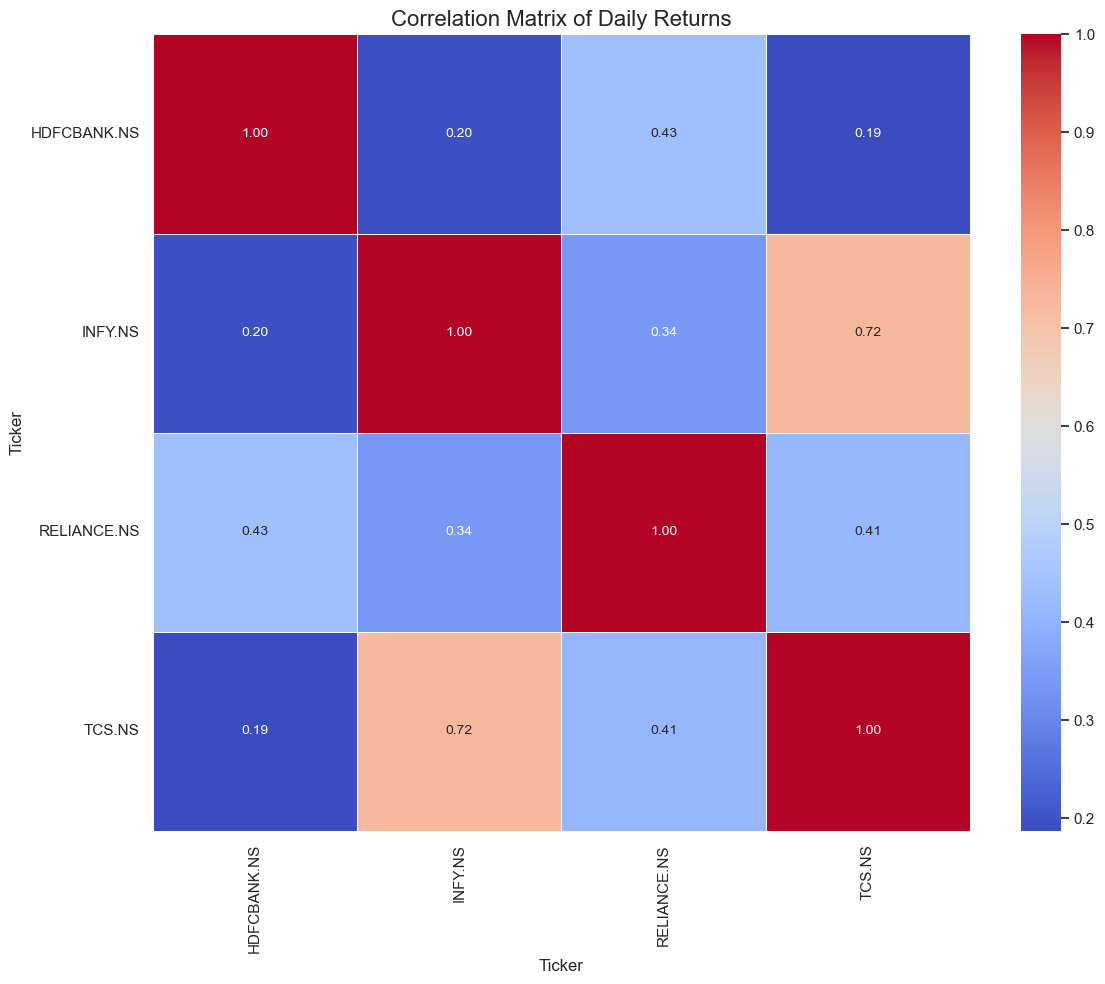

In [49]:
def corr_daily_returns(stock_data):
    ''' Plotting Correlation Matrix of Daily Returns'''
    daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
    correlation_matrix = daily_returns.corr()
    
    plt.figure(figsize=(12, 10))
    sns.set(style='whitegrid')
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
    plt.title('Correlation Matrix of Daily Returns', fontsize=16)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

corr_daily_returns(stock_data)

INFY and TCS have a high positive correlation (0.73), which indicates that they tend to move in the same direction IT Sector. HDFCBANK has a moderate positive correlation with RELIANCE (0.42) and a low correlation with INFY (0.18) and TCS (0.16). RELIANCE shows a weak correlation with INFY (0.31) and TCS (0.39). These varying correlations suggest potential diversification benefits; combining stocks with lower correlations can reduce overall portfolio risk.

In [51]:
import numpy as np
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.255022,0.184288
INFY.NS,-0.160854,0.250488
RELIANCE.NS,-0.040475,0.212566
TCS.NS,-0.322176,0.206691


HDFCBANK has the highest expected return (24.42%) and low volatility (18.44%), which indicates a potentially high-reward investment with relatively lower risk.Other Stocks are giving negligible returns with Reliance and TCS are negatively Performing in the market and having very high volatility 

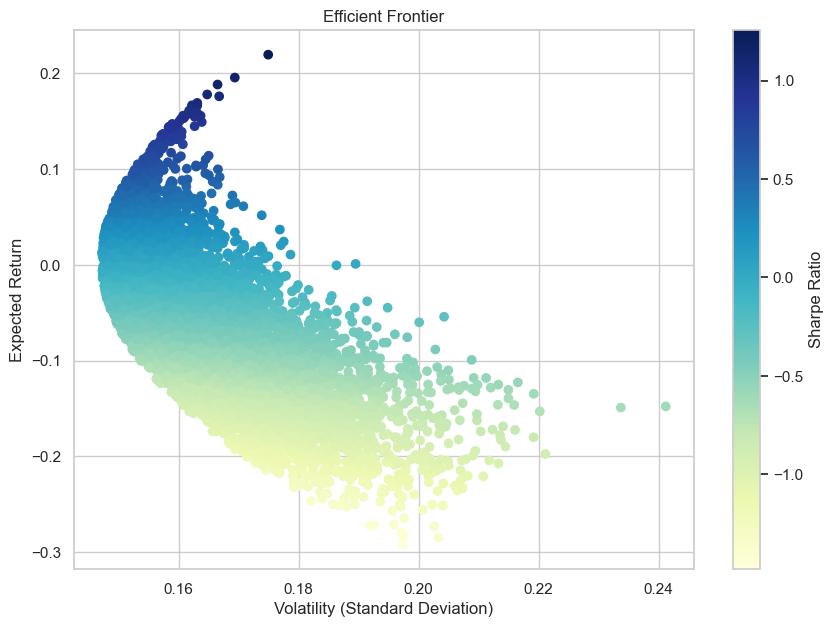

In [52]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    ''' Calculating Weighted Returns and Volatility
    by it's respective weights'''
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

Each dot represents a portfolio, with the colour indicating the Sharpe ratio, a measure of risk-adjusted return. Portfolios on the leftmost edge of the frontier (closer to the y-axis) offer the highest expected returns for a given level of volatility, which represent optimal portfolios. The gradient shows that portfolios with higher Sharpe ratios (darker blue) provide better risk-adjusted returns.

In [53]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.21966483374329493, 0.1749397105847823, 1.2556602100746999)

- ### Expected Return : ~22.17%
- ### Volatility : ~17.49%
- ### Sharpe Ratio: ~1.27

In [54]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.388177
1,INFY.NS,0.023937
2,RELIANCE.NS,0.158147
3,TCS.NS,0.429738


## Diversified portfolio with the following allocations:
- HDFCBANK (38.81%)
- INFY (2.39%)
- RELIANCE (15.81%)
- and TCS (42.97%)